## Zadanie projektowe nr 2
#### Przetwarzanie tekstu i analiza opinii

#### Funkcja do pobierania tweetów, pobiera 600 tweetów z danego okresu.

In [3]:
import pandas as pd
import snscrape.modules.twitter as sns

def get_tweets(start_day, end_day):
    query = f'(#SpiderManNoWayHome) lang:en until:{end_day} since:{start_day}'
    tweets = []
    limit = 600

    for tweet in sns.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.content])

    return pd.DataFrame(tweets, columns=['Date', 'Tweet'])

#### Funkcja oceniająca czy dane wyrażenie jest pozytywne, czy negatywne.

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    # print("Sentence Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

### Analiza nr 1:
##### Bierzemy tweety z zakresu 2021-08-23 - 2022-01-16
##### i analizujemy ilość pozytywnych /negatywnych tweetów.
##### Tweety z hashtagiem "#SpiderManNoWayHome".
---
##### * "2021-08-23" -> wypuszczenie pierwszego trailera
##### * "2021-12-17" -> premiera filmu

#### Tworzymy listę dat z analizowanego przedziału czasowego.
#### Mniej więcej 3 miesiące i analizujemy co 4 dzień.

In [5]:
from datetime import date

start_date = date(2021, 8, 23)
end_date = date(2022, 1, 16) #1

dates1 = pd.date_range(start_date, end_date ,freq='4d')

#### Pobieranie i zapisywanie tweetów do pliku csv (łącznie, około 22 000 tweetów, 600 tweetów na dzień)

In [99]:
from datetime import timedelta
# zakomentowane, żeby przypadkiem nie włączyło się pobieranie tweetów
# df_dates_with_tweets1 = pd.DataFrame(columns=['Date', 'Tweet'])

# for val in dates1:
#     start_date = val.date()
#     end_date = start_date + timedelta(days=1)
#
#     # pobieramy tweety z danego dnia
#     temp_tweets = get_tweets(start_date, end_date)
#
#     # dodajemy te tweety do dataFrama
#     df_dates_with_tweets1 = pd.concat([df_dates_with_tweets1, temp_tweets])
#
# print("done")
# df_dates_with_tweets1.to_csv('spiderTweets.csv')

done


#### Zliczanie pozytywnych i negatywnych tweetów na każdy dzień w naszej liście.

In [6]:
df_dates_with_tweets1 = pd.read_csv ('spiderTweets.csv')
df_dates1_emotion = pd.DataFrame(columns=['Date', 'Number of positive tweets', 'Number of negative tweets'])

# df_dates1_emotion uzupełniam datami z lista dat
for val in dates1:
    df_dates1_emotion.loc[len(df_dates1_emotion.index)] = [val.date(), 0, 0]

# iteruje po df_dates1_emotion by dla każdej daty znaleść liczbe pozytywnych i negatywnych tweetów
for index in df_dates1_emotion.index:
    temp_date = df_dates1_emotion.at[index, 'Date']

    # iteruje po tweetach i znajduje tweety z tego dnia
    for j in df_dates_with_tweets1.index:
        tweet_date = df_dates_with_tweets1.at[j, 'Date'].split(" ")[0]

        if temp_date.strftime("%Y-%m-%d") == tweet_date:
            # sprawdzamy czy tweet jest pozytywny czy negatywny

            curr_tweet = df_dates_with_tweets1.at[j, 'Tweet']
            result = sentiment_scores(curr_tweet)

            if result == "Positive":
                df_dates1_emotion.at[index, 'Number of positive tweets'] += 1
            elif result == "Negative":
                df_dates1_emotion.at[index, 'Number of negative tweets'] += 1

#### Wykres naszej analizy.
Może dodać wykres już bez pokazywania pozytywnych negatywnych wykres, jakiego filmu, który wychodzi i czy to się jakoś pokryje

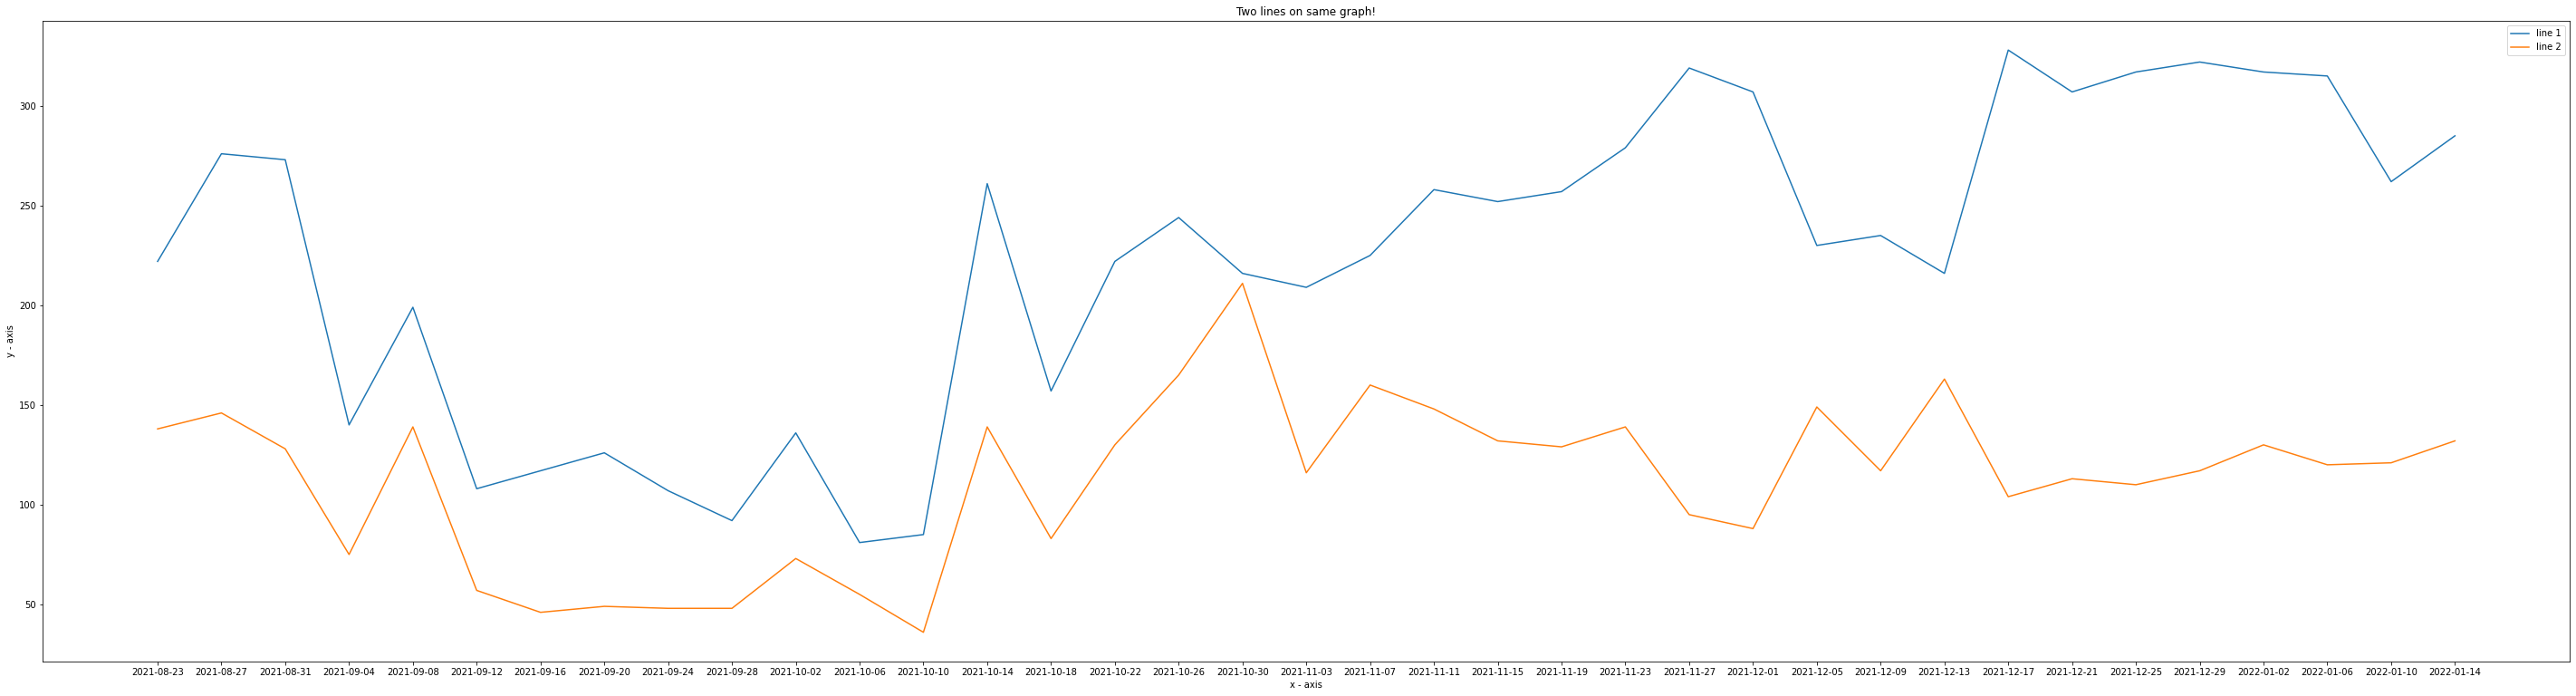

In [8]:
from matplotlib import pyplot as plt

np_arr = df_dates1_emotion.values
x = np_arr[:,0]

y_positive = np_arr[:,1]
y_negative = np_arr[:,2]

plt.figure(figsize=(50, 13))

plt.plot(x, y_positive, label = "line 1")
plt.plot(x, y_negative, label = "line 2")

plt.xlabel('x - axis')
plt.xticks(x)

plt.ylabel('y - axis')

plt.title('Two lines on same graph!')
plt.legend()
plt.savefig('plot.png')
plt.show()

#### "2021-08-23" -> wypuszczenie pierwszego trailera
#### "2021-10-15" -> artykuły o tym, że to ma być ostatni część trylogii
zacząłem googlać z ustawieniami konkretnego zakresu czasowego
#### "2021-11-16" -> drugi trailer
#### "2021-12-17" -> premiera filmu

### Analiza nr 2.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.
#### Łączenie wszystkich tweetów w jeden tekst i tokenizowanie.

In [9]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    all_tweets_as_text += curr_tweet.lower()


import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

458191


##### Ilość słów: 458191

#### Filtrowanie słów(stopwords) też usuwam takie bardziej oczywiste słowa.

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 166109


##### Ilość słów: 166942

#### Lematyzacja.

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#--------------------------------------------------------
lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

### Wykres z ilością słów.

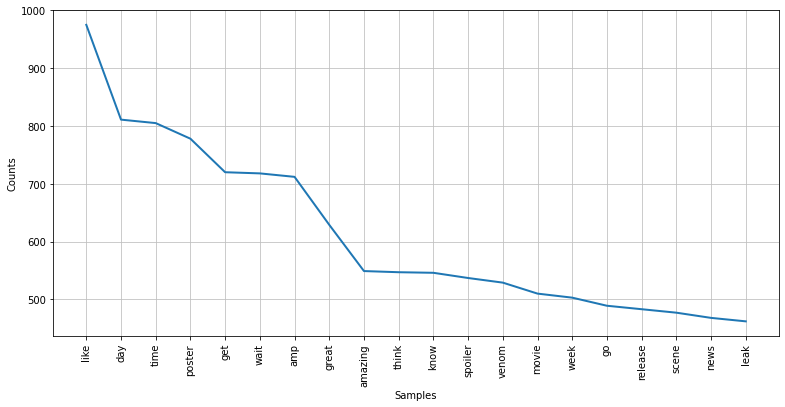

In [24]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

### Chmura tagów.

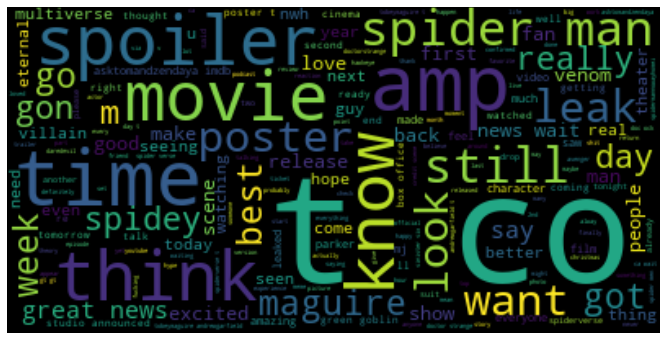

In [25]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analiza nr 3.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.
#### Ale teraz tylko dla pozytywnych tweetów.

#### Łączenie tweetów w jeden tekst i tokenizowanie.

In [26]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    result = sentiment_scores(curr_tweet)

    if result == "Positive":
        all_tweets_as_text += curr_tweet.lower()

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

246021


#### Ilość słów: 246021

#### Dla lepszego porównania filtrujemy z tych samych słów co poprzednio.

In [27]:
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 89446


##### Ilość słów: 89446

#### Lematyzacja.

In [28]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

### Wykres z ilością słów.

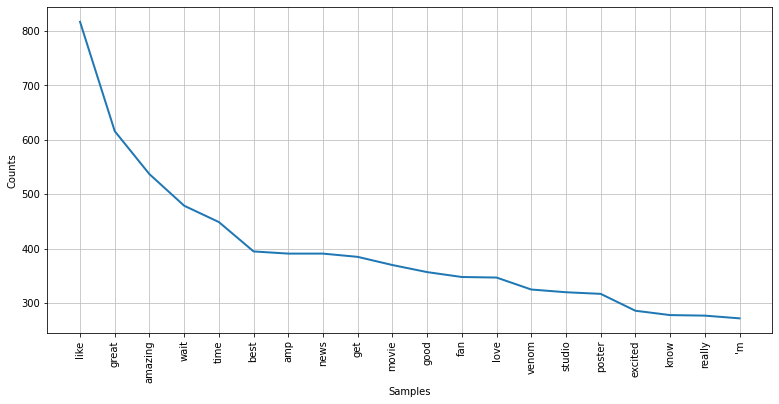

In [29]:
plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

#### Chmura tagów.

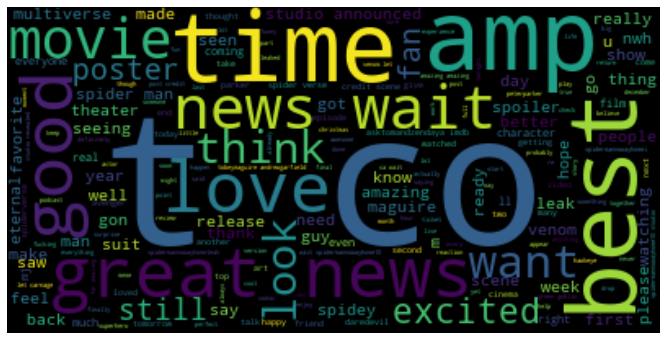

In [30]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analiza nr 4.
#### Zliczanie słów i chmura tagów dla wszystkich tweetów.
#### Ale teraz tylko dla negatywnych tweetów.

#### Łączenie tweetów w jeden tekst i tokenizowanie.

In [31]:
all_tweets_as_text = ''

for i in df_dates_with_tweets1.index:
    curr_tweet = df_dates_with_tweets1.at[i, 'Tweet']
    result = sentiment_scores(curr_tweet)

    if result == "Negative":
        all_tweets_as_text += curr_tweet.lower()

from nltk.tokenize import word_tokenize

all_tweets_as_words = word_tokenize(all_tweets_as_text)
print(len(all_tweets_as_words))

109721


##### Ilość słów: 109721

#### Dla lepszego porównania filtrujemy z tych samych słów co poprzednio.

In [32]:
stop_words = set(stopwords.words("english"))

# dodawanie nowych słów
my_stop_words = {"#", "twitter", "SpiderManNowWayHome", "https", "spiderman", "//t.co/vizwobeq17jb", ":", "90", "spidermannowayhome", "nowayhometrailer", "nowayhome", "@", "'s", ".", ",", "?", "!", "(", ")", "'", ";", "2", "`", "\"", "&", "spider-man", "movie", "n't", "-", "trailer", "tobey", "mcu", "marvelstudios", "home", "way", "marvel", "film", "zendaya", "spidermanmovie", "tom", "holland", "andrew", "garfield", "3", "tomholland1996", "peter", "sony", "sonypictures", "t", "co", "see", "new", "would", "going", "...", "“", "'ve", "''", "’", "``", "one", "$", "tomholland", "na", "movie", "spidermannowayhometrailer", "watch"}

stop_words.update(my_stop_words)

filtered_tweets_as_words = []
for w in all_tweets_as_words:
    if w not in stop_words:
        filtered_tweets_as_words.append(w)

print("Filtered:", len(filtered_tweets_as_words))

Filtered: 40033


##### Ilość słów: 40033

#### Lematyzacja.

In [33]:
lem = WordNetLemmatizer()

lemmed_words = []
for w in filtered_tweets_as_words:
    lemmed_words.append(lem.lemmatize(w))

#### Wykres z ilością słów.

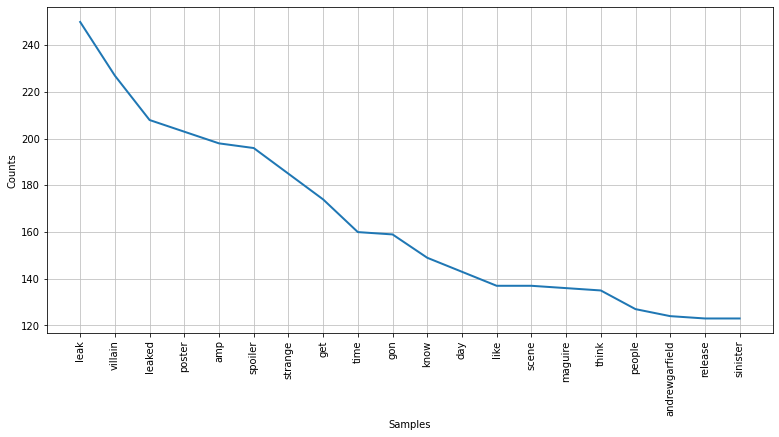

In [34]:
plt.figure(figsize=(13, 6))
fdist = FreqDist(lemmed_words)

fdist.plot(20,cumulative=False)
plt.show()

#### Chmura tagów.

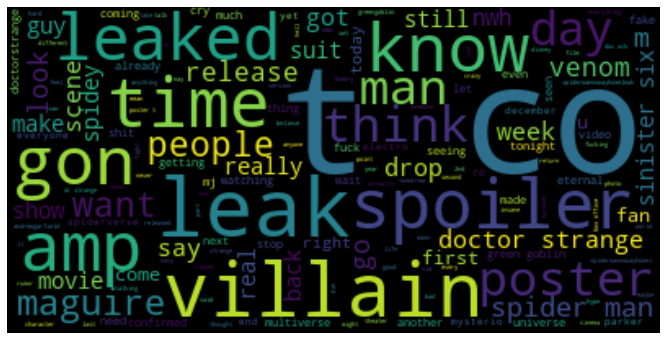

In [35]:
warnings.filterwarnings("ignore")

lemmed_words_as_text = ""

for w in lemmed_words:
    lemmed_words_as_text = lemmed_words_as_text + " " + w

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(lemmed_words_as_text)

# Display the generated image:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()